1) Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import os
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Exploring Netflix: Data Analysis and Prediction                                  
Project Overview: This project explores a dataset containing Netflix content details, including information on the content type (Movies/TV Shows), release years, ratings, and more. Through a series of visualizations and statistical analyses, we aim to uncover trends and relationships within the data. Additionally, machine learning techniques are applied to predict content ratings based on features like release year and duration. This notebook includes insights into the distribution of content types, ratings, and the evolution of Netflix content over time.

2) Data pre-processing

In [3]:
netflix=pd.read_csv('/Users/ghulamabbaszafari/Downloads/New_proj_Netflix/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix.shape


(6234, 12)

In [5]:
netflix.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


3) Data visualization

Let's find out what was released more, movies or TV shows

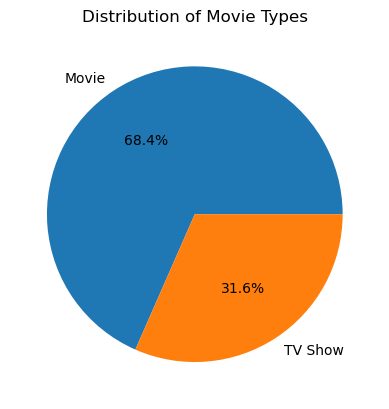

In [7]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'netflix' with a 'type' column

# Get the counts of each type of movie
type_counts = netflix["type"].value_counts()

# Create the pie chart
plt.pie(type_counts, labels=type_counts.index, autopct=lambda x: f"{x:.1f}%")

# Add a title (optional)
plt.title("Distribution of Movie Types")

# Save the plot as a PNG file
plt.savefig("movie_type_distribution.png", format="png")

# Show the plot
plt.show()


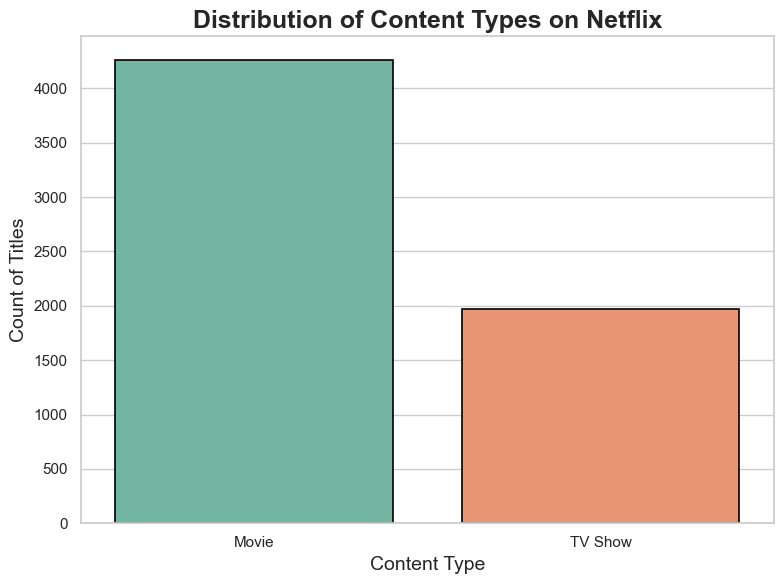

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is loaded in a DataFrame named 'netflix'

# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot for the 'type' variable with hue for distinction
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="type", data=netflix, hue="type", palette="Set2", edgecolor='black', linewidth=1.2)

# Set plot titles and labels with enhanced font sizes
plt.title('Distribution of Content Types on Netflix', fontsize=18, weight='bold')
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Count of Titles', fontsize=14)

# No need to manually define the legend, Seaborn already handles it
# Seaborn automatically adds the legend based on the 'hue' parameter
plt.tight_layout()  # Ensures no clipping of labels
plt.show()


Let's look at the growth of projects since 2000

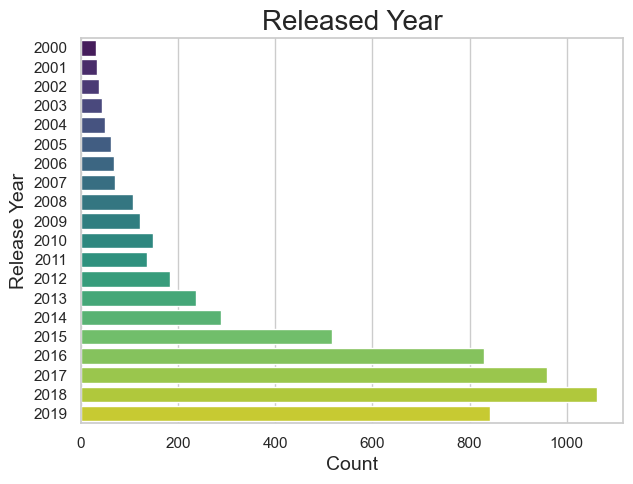

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette
palette = sns.color_palette("viridis", n_colors=len(netflix[(netflix["release_year"] >= 2000) & (netflix["release_year"] < 2020)]["release_year"].unique()))

# Create the plot
plt.figure(figsize=(7, 5))
sns.countplot(
    y="release_year",
    data=netflix[(netflix["release_year"] >= 2000) & (netflix["release_year"] < 2020)],
    hue="release_year",
    palette=palette,
    dodge=False,  # Ensure bars are not grouped
    legend=False
)
plt.title('Released Year', fontsize=20)
plt.ylabel('Release Year', fontsize=14)
plt.xlabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig("release_year_distribution.png", format="png")

# Show the plot
plt.show()


How many TV shows have only the first season, and what time in minutes is the most popular among the duration of the films?

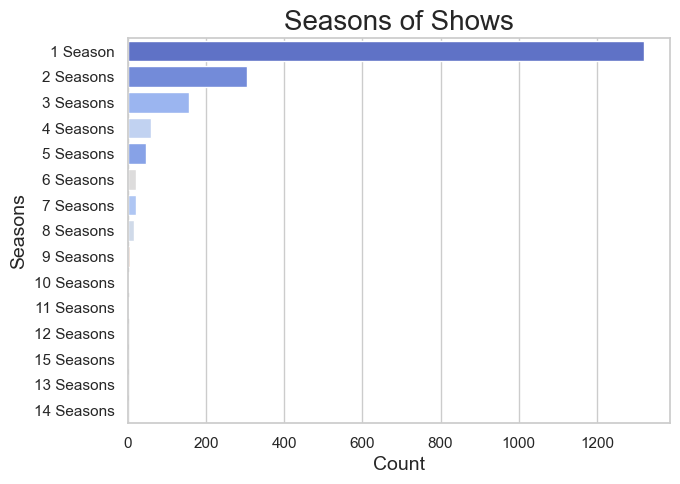

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for TV Shows
tv_show = netflix[netflix['type'] == 'TV Show']

# Define a color palette
palette = sns.color_palette("coolwarm", n_colors=len(tv_show['duration'].value_counts().head(25)))

# Create the plot
plt.figure(figsize=(7, 5))
sns.countplot(
    y='duration',
    data=tv_show,
    order=tv_show['duration'].value_counts().head(25).index,
    hue='duration',
    palette=palette,
    dodge=False,
    legend=False
)
plt.title('Seasons of Shows', fontsize=20)
plt.ylabel('Seasons', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.show()


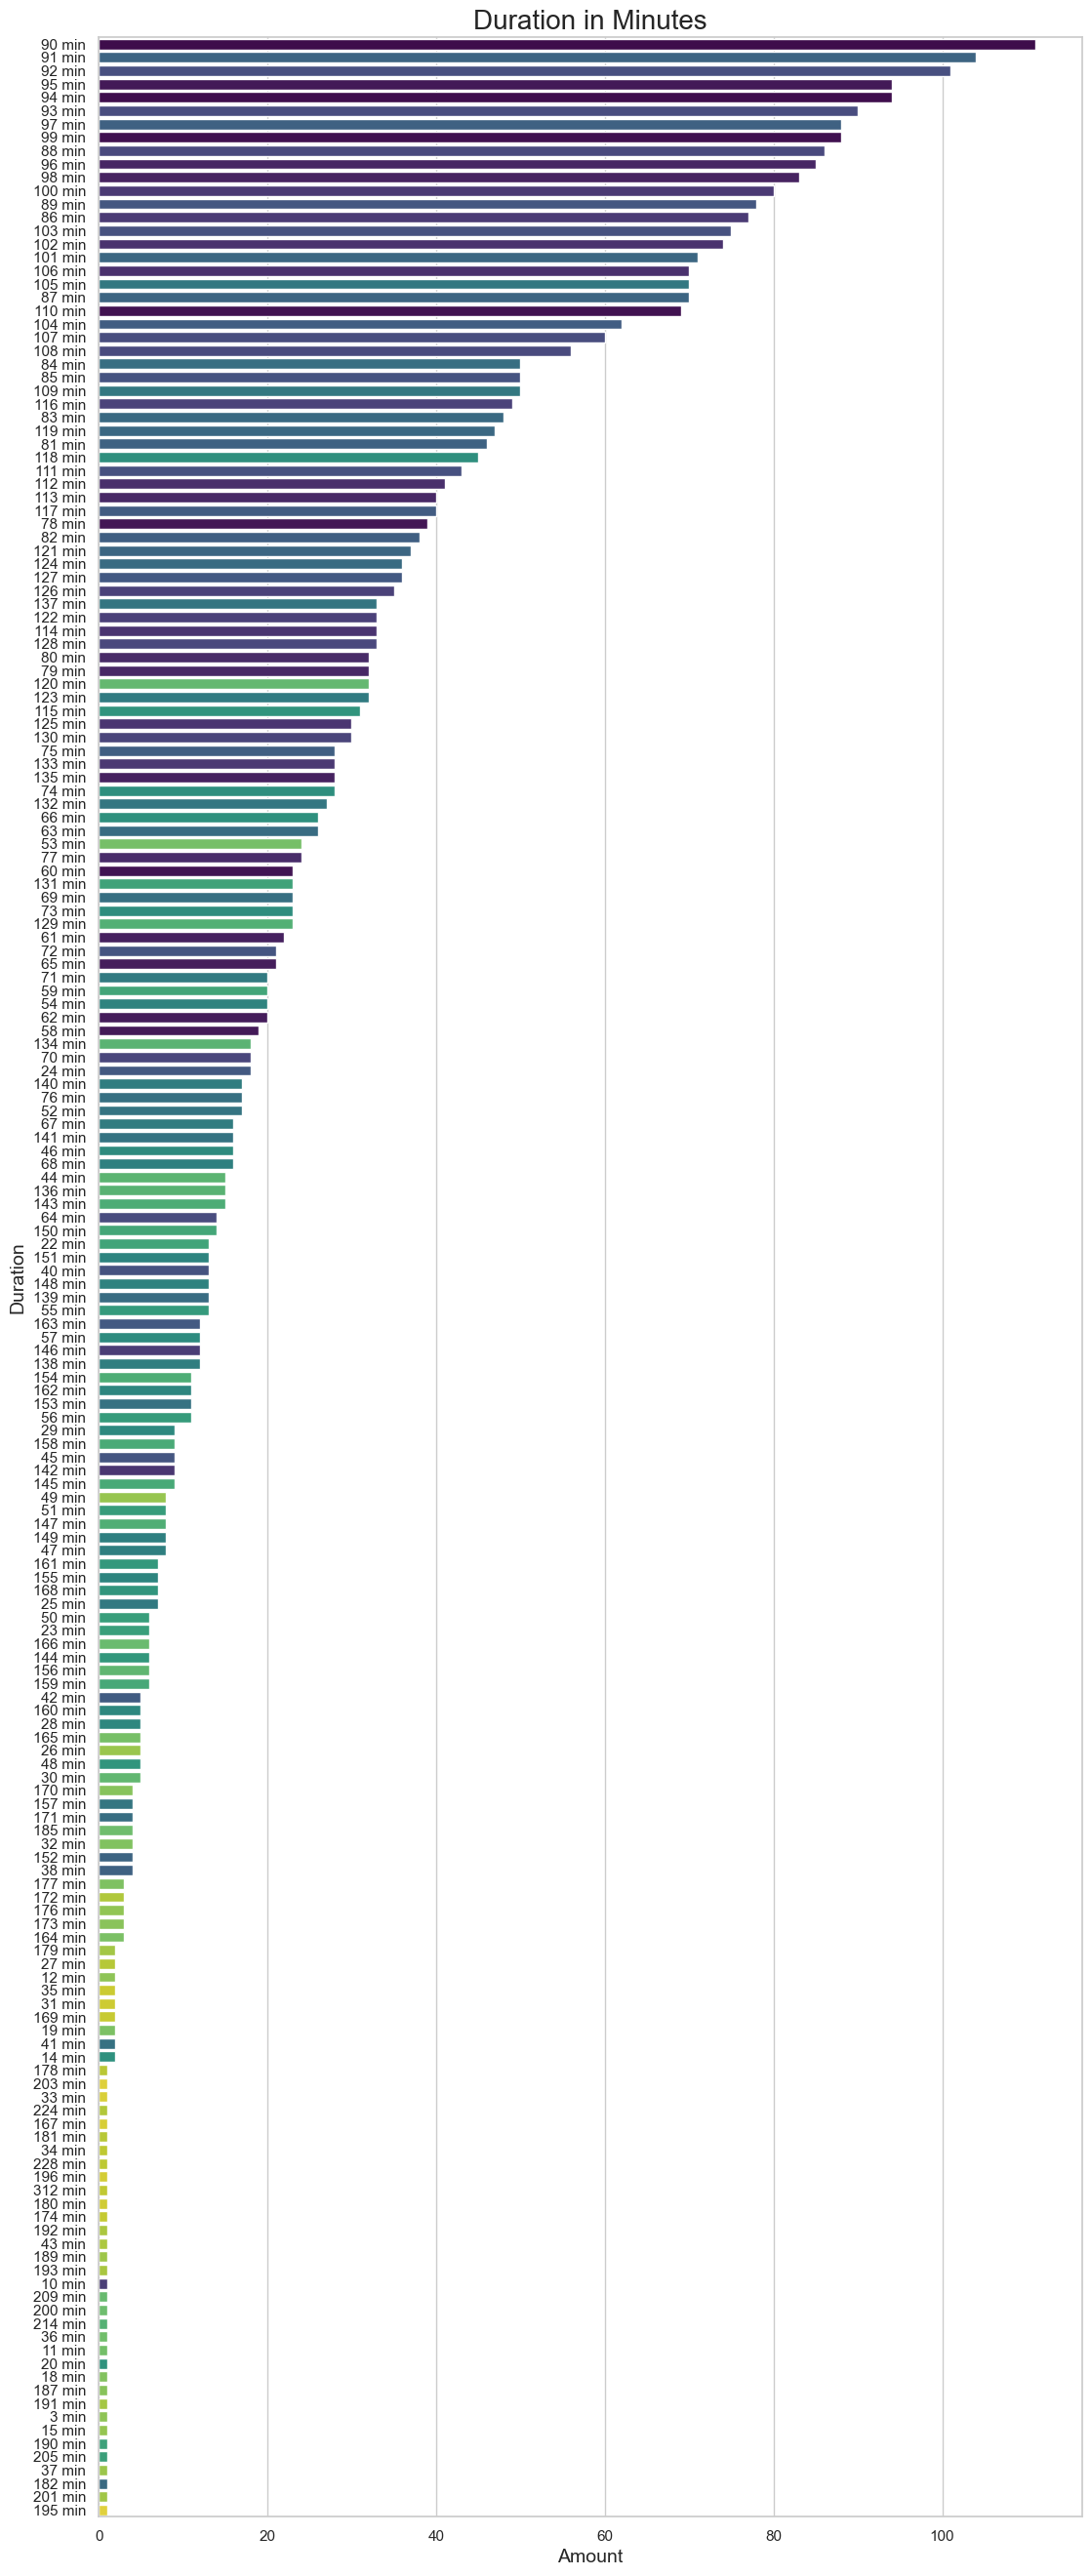

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Movies
movie = netflix[netflix['type'] == 'Movie']

# Define a color palette
palette = sns.color_palette("viridis", n_colors=len(movie['duration'].value_counts()))

# Create the plot
plt.figure(figsize=(13, 33))
sns.countplot(
    y='duration',
    data=movie,
    order=movie['duration'].value_counts().index,
    hue='duration',
    palette=palette,
    dodge=False,
    legend=False
)
plt.title('Duration in Minutes', fontsize=20)
plt.ylabel('Duration', fontsize=14)
plt.xlabel('Amount', fontsize=14)
plt.show()


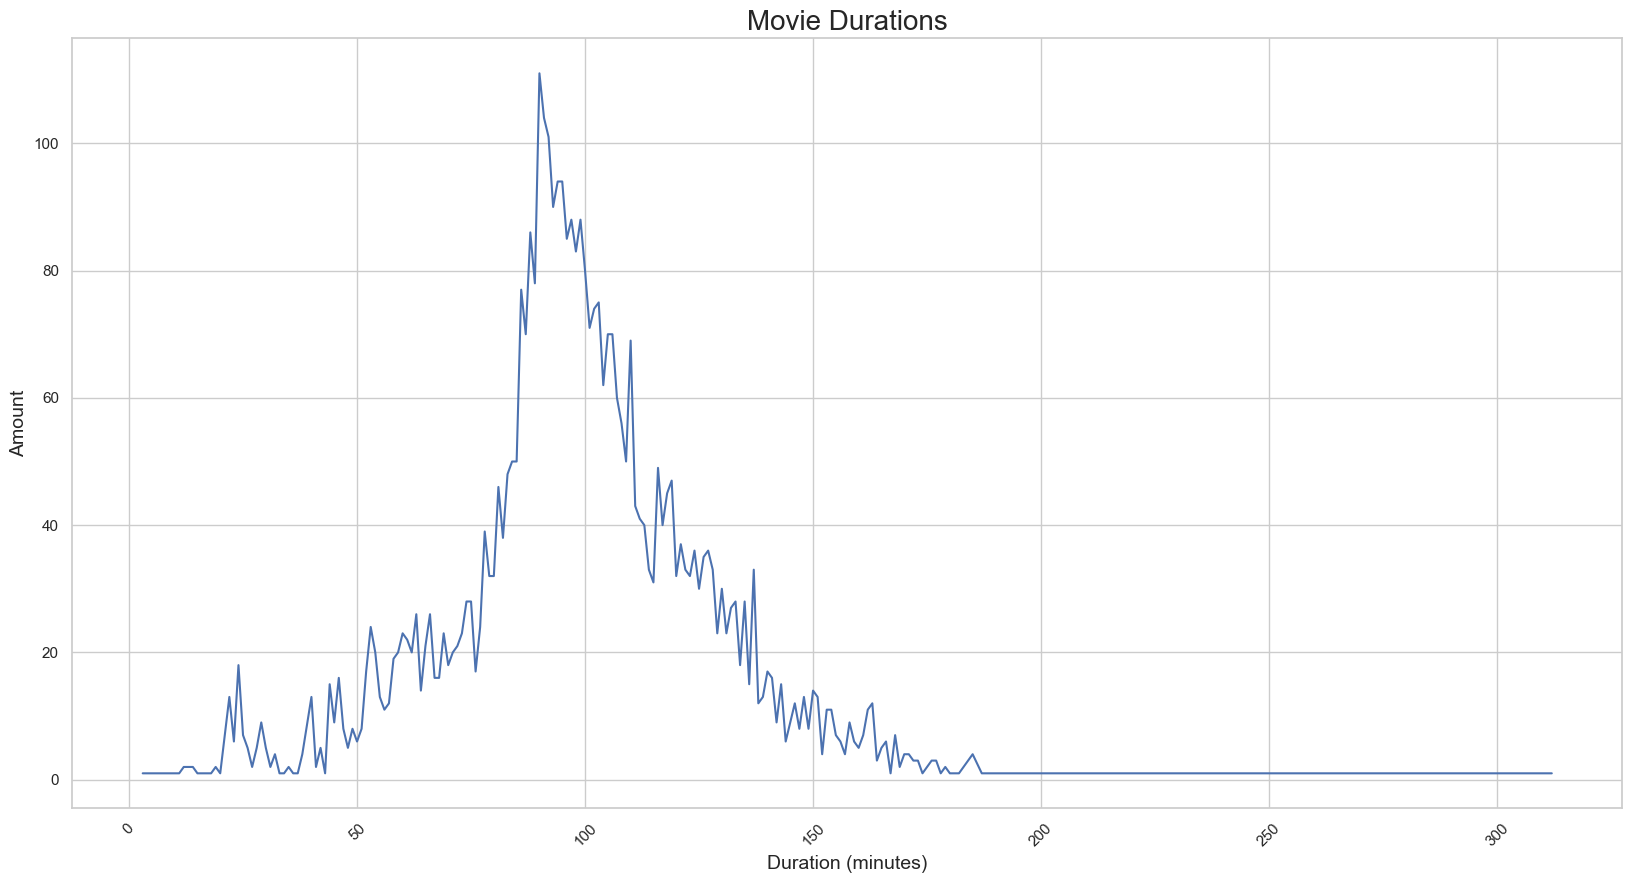

In [12]:
# Filter the movie DataFrame and create a copy
movie = netflix[netflix['type'] == 'Movie'].copy()

# Ensure all values in the 'duration' column are strings
movie['duration'] = movie['duration'].astype(str)

# Remove "min" from the duration column and convert to integer
movie['duration'] = movie['duration'].str.replace(' min', '', regex=False).astype(int)

# Get the value counts of movie durations
movie_duration = movie['duration'].value_counts().sort_index()

# Create the plot
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x=movie_duration.index, y=movie_duration.values)
plt.title('Movie Durations', fontsize=20)
plt.ylabel('Amount', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


How many countries work with Netflix?

In [13]:
netflix.isnull().sum()
netflix.dropna(inplace = True)
netflix.shape

(3774, 12)

In [14]:
netflix['country_projects'] = netflix['country'].apply(lambda x :  x.replace(', ',',').replace(' ,','').split(','))

In [15]:
country_projects = {}
for i in netflix['country_projects']:
    for length in range(len(i)):
        if i[length] in country_projects:
            country_projects[i[length]]+=1
        else:
            country_projects[i[length]]=1

In [16]:
country_projects

{'United States': 1718,
 'India': 762,
 'South Korea': 52,
 'China': 79,
 'Bulgaria': 8,
 'Spain': 120,
 'Canada': 194,
 'Chile': 19,
 'United Kingdom': 341,
 'Denmark': 24,
 'Sweden': 19,
 'Netherlands': 25,
 'Belgium': 54,
 'France': 191,
 'Thailand': 36,
 'Pakistan': 20,
 'Turkey': 66,
 'Brazil': 40,
 'Italy': 40,
 'Indonesia': 49,
 'Hong Kong': 91,
 'Morocco': 5,
 'Vietnam': 4,
 'Argentina': 50,
 'Nigeria': 35,
 'Greece': 4,
 'Norway': 11,
 'Ireland': 21,
 'Switzerland': 13,
 'United Arab Emirates': 20,
 'Japan': 80,
 'Cambodia': 3,
 'Russia': 5,
 'Mexico': 78,
 'Israel': 15,
 'Germany': 113,
 'Australia': 67,
 'Portugal': 4,
 'Egypt': 44,
 'Taiwan': 12,
 'Austria': 7,
 'Soviet Union': 3,
 'Peru': 7,
 'Uruguay': 5,
 'Malaysia': 14,
 'South Africa': 23,
 'Nepal': 2,
 'Philippines': 45,
 'Poland': 21,
 'Serbia': 5,
 'Singapore': 17,
 'Luxembourg': 7,
 'Cayman Islands': 1,
 'New Zealand': 13,
 'Venezuela': 1,
 'Jordan': 4,
 'Saudi Arabia': 1,
 'Iceland': 5,
 '': 1,
 'West Germany': 2,

In [17]:
print(f'{len(country_projects)} countries work with Netflix')

96 countries work with Netflix


Which countries have made the most films and TV series?

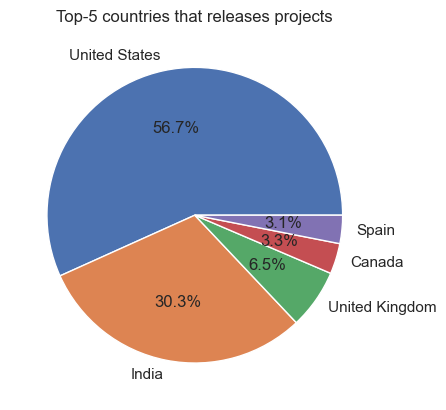

In [18]:
import matplotlib.pyplot as plt

# Create the pie chart for top 5 countries
plt.pie(netflix["country"].value_counts()[:5], 
        labels=netflix["country"].value_counts().index[:5], 
        autopct=lambda x: f"{x:.1f}%")

# Add a title
plt.title("Top-5 countries that releases projects")

# Save the plot as a PNG file
plt.savefig("top_5_countries_pie_chart.png", format="png")

# Show the plot
plt.show()



In [19]:
netflix["country"].value_counts()[:5]

country
United States     1323
India              707
United Kingdom     152
Canada              78
Spain               72
Name: count, dtype: int64

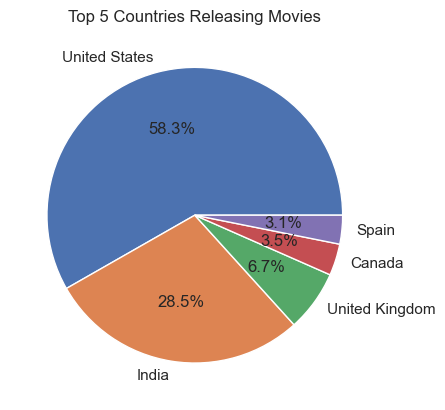

In [20]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'movie' with a 'country' column (or the correct name)

# Check if 'country' column exists (optional)
if 'country' not in movie.columns:
    print("Error: 'country' column not found in DataFrame")
    exit()

try:
    # Get the top 5 countries (by movie count)
    top_5_countries = movie["country"].value_counts().head(5)

    # Extract country names and counts for the pie chart
    country_labels = top_5_countries.index.to_numpy()  # Convert index to NumPy array for plotting
    movie_counts = top_5_countries.to_numpy()

    # Create the pie chart
    plt.pie(movie_counts, labels=country_labels, autopct=lambda x: f"{x:.1f}%")

    # Add a title
    plt.title("Top 5 Countries Releasing Movies")

    # Show the plot
    plt.show()

except KeyError:
    print("Error: 'country' column might have missing values or incorrect data types.")
    print("Consider handling missing values (e.g., using fillna()) or data cleaning before plotting.")

In [21]:
movie["country"].value_counts()[:5]

country
United States     1482
India              724
United Kingdom     170
Canada              88
Spain               80
Name: count, dtype: int64

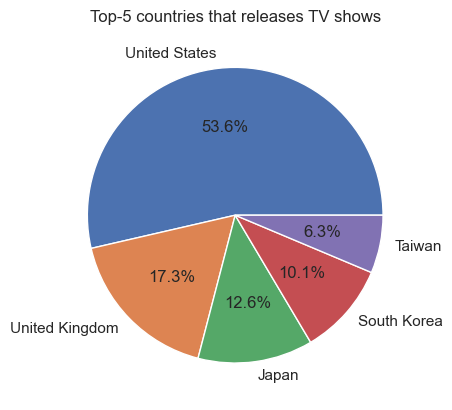

In [22]:
plt.pie(tv_show["country"].value_counts()[:5], labels = tv_show["country"].value_counts().index[:5], autopct=lambda x:f"{x:.1f}%");
plt.title("Top-5 countries that releases TV shows");
plt.show()

This line of code counts the number of TV shows available in each country and selects the top 5 countries with the most shows. It helps me identify the countries with the highest TV show presence in the dataset.

In [23]:
tv_show["country"].value_counts()[:5]

country
United States     550
United Kingdom    178
Japan             129
South Korea       104
Taiwan             65
Name: count, dtype: int64

In [24]:
netflix['directors'] = netflix['director'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

In [25]:
directors = {}
for i in netflix['directors']:
    for length in range(len(i)):
        if i[length] in directors:
            directors[i[length]]+=1
        else:
            directors[i[length]]=1

In [26]:
print(f"Amount of directors are {len(directors)}")

Amount of directors are 3202


In [27]:
directors

{'Richard Finn': 1,
 'Tim Maltby': 2,
 'Fernando Lebrija': 1,
 'Gabe Ibáñez': 1,
 'Rodrigo Toro': 1,
 'Francisco Schultz': 1,
 'Henrik Ruben Genz': 1,
 'Daniel Alfredson': 2,
 'Gaspar Noé': 1,
 "Tom O'Brien": 1,
 'Antoine Bardou-Jacquet': 1,
 'Brad Anderson': 2,
 'Austin Stark': 1,
 'Hannah Fidell': 1,
 'Sopon Sukdapisit': 1,
 'Kevin R. Adams': 1,
 'Joe Ksander': 1,
 'Ian Samuels': 1,
 'Franck Ribière': 1,
 'Daniele Thompson': 1,
 'Anubhav Sinha': 1,
 'Tharun Bhascker': 1,
 'Tom Gianas': 1,
 'Ross R. Shuman': 1,
 'Rajkumar Hirani': 3,
 'Robert Osman': 1,
 'Nathanael Wiseman': 1,
 'Jon Spira': 1,
 'Mez Tharatorn': 2,
 'Adisorn Tresirikasem': 1,
 'Banjong Pisanthanakun': 4,
 'Paween Purikitpanya': 1,
 'Songyos Sugmakanan': 1,
 'Parkpoom Wongpoom': 2,
 'Visute Poolvoralaks': 1,
 'Chayanop Boonprakob': 1,
 'Susan Johnson': 2,
 'Lynn Shelton': 3,
 'Farhan Alam': 1,
 'Chad Archibald': 1,
 'Brian Baugh': 1,
 'A. L. Vijay': 2,
 'Ryan Coogler': 1,
 'Ben Palmer': 1,
 'Chris Howe': 1,
 'Ken Kwapi

In [28]:
print(f"Director that worked more than others: {max(directors, key=directors.get)}, he worked with {directors[max(directors, key=directors.get)]} projects")

Director that worked more than others: Jan Suter, he worked with 21 projects


In [29]:
date_added = []
release_year = []

for i in netflix["date_added"]:
    date_added.append(int(i.split(",")[1]))

for j in netflix["release_year"]:
    release_year.append(j)

In [30]:
difference = np.array(date_added)-np.array(release_year)
print(f"The largest gap is {difference.max()}")

The largest gap is 75


In [31]:
difference_list = difference.tolist()
print(f"The project with the largest gap was released at {release_year[np.argmax(difference_list)]}")

The project with the largest gap was released at 1942


In [32]:
print(f"The project with the largest gap among the release and addition dates: {netflix[netflix['release_year']==release_year[np.argmax(difference_list)]]['title'].values[0]}")

The project with the largest gap among the release and addition dates: The Battle of Midway


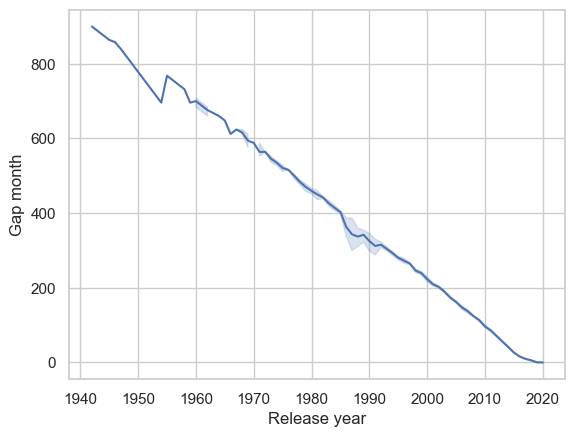

In [33]:
sns.lineplot(x=netflix["release_year"], y=difference*12);
plt.xlabel('Release year');
plt.ylabel('Gap month');
plt.show()

In [34]:
netflix.rating.unique()

array(['TV-PG', 'TV-14', 'R', 'TV-MA', 'NR', 'PG-13', 'PG', 'TV-Y7', 'G',
       'TV-G', 'UR', 'TV-Y7-FV', 'TV-Y', 'NC-17'], dtype=object)

In [35]:
netflix['genre'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

In [36]:
genre = {}
for i in netflix['genre']:
    for length in range(len(i)):
        if i[length] in genre:
            genre[i[length]]+=1
        else:
            genre[i[length]]=1

In [37]:
genre

{'Children & Family Movies': 322,
 'Comedies': 1058,
 'International Movies': 1722,
 'Sci-Fi & Fantasy': 185,
 'Thrillers': 382,
 'Stand-Up Comedy': 241,
 'Action & Adventure': 583,
 'Dramas': 1572,
 'Cult Movies': 54,
 'Independent Movies': 545,
 'Romantic Movies': 363,
 'Horror Movies': 254,
 'Documentaries': 306,
 'Music & Musicals': 193,
 'Faith & Spirituality': 41,
 'LGBTQ Movies': 51,
 'International TV Shows': 50,
 'TV Comedies': 17,
 'TV Dramas': 32,
 'Movies': 20,
 'British TV Shows': 17,
 'Crime TV Shows': 23,
 'Classic Movies': 76,
 'Sports Movies': 116,
 'Anime Features': 43,
 'TV Action & Adventure': 11,
 'Korean TV Shows': 10,
 'Romantic TV Shows': 12,
 'Docuseries': 9,
 'Spanish-Language TV Shows': 5,
 'Anime Series': 8,
 "Kids' TV": 10,
 'Stand-Up Comedy & Talk Shows': 8,
 'TV Mysteries': 4,
 'TV Shows': 4,
 'TV Thrillers': 3,
 'TV Horror': 4,
 'TV Sci-Fi & Fantasy': 5,
 'Teen TV Shows': 2,
 'Classic & Cult TV': 2,
 'Science & Nature TV': 1,
 'Reality TV': 1}

In [38]:
print(f'There are {len(genre)} genres')

There are 42 genres


In [39]:
print(f"The most popular genre is : {max(genre, key=genre.get)}, there are {genre[max(genre, key=genre.get)]} projects that have this genre")

The most popular genre is : International Movies, there are 1722 projects that have this genre


Let's identify and visualize the top 10 most popular genres on Netflix by splitting the 'listed_in' column into individual genres and counting their occurrences. The barplot then displays these top genres with their respective counts, using the 'viridis' color palette for clear visualization.

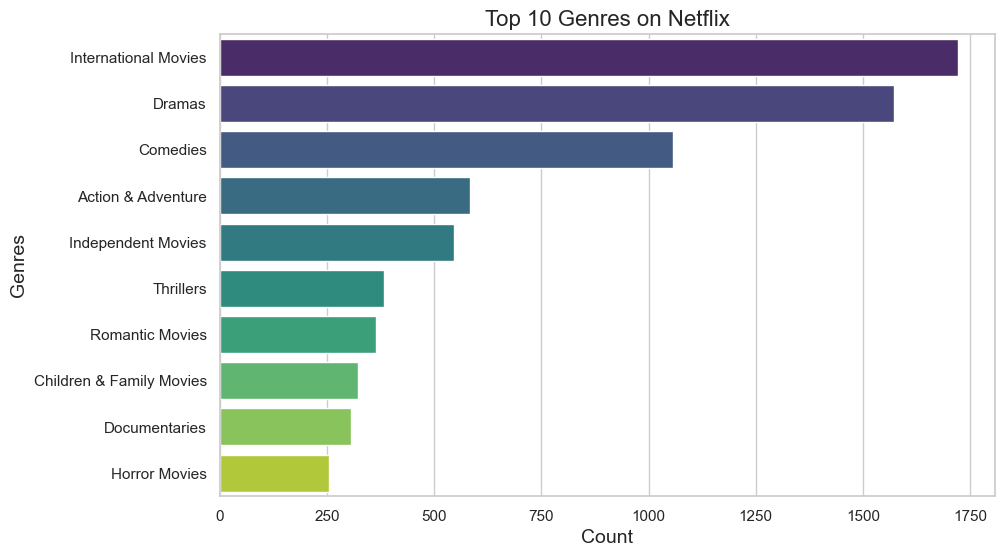

In [41]:
# Visualize
# Analyze the most popular genres
genre_counts = netflix['listed_in'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='viridis', dodge=False)
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genres', fontsize=14)

# Save the plot as a PNG file
plt.savefig("top_10_genres_netflix.png", format="png")

# Show the plot
plt.show()


Let's identify and visualize the top 10 countries producing content on Netflix by counting the occurrences of each country in the 'country' column. The barplot displays these countries with their respective content counts, using the 'coolwarm' color palette for better clarity.

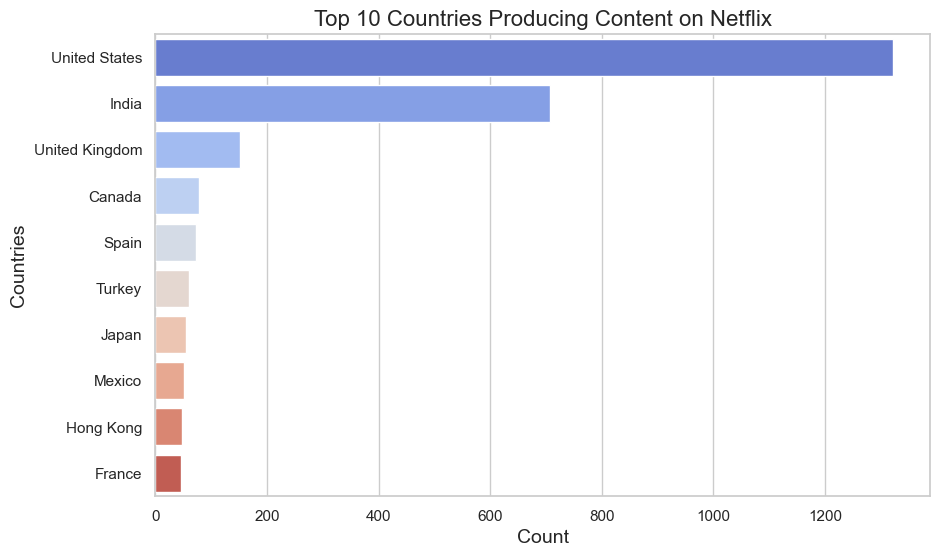

In [42]:
# Visualize
# Analyze top contributing countries
country_counts = netflix['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, hue=country_counts.index, palette='coolwarm', dodge=False)
plt.title('Top 10 Countries Producing Content on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Countries', fontsize=14)
plt.show()


Let's identify and visualize the growth of content on Netflix over time by counting the number of titles released each year. The line plot illustrates the content growth, with data points marked for each year, allowing us to track trends in content addition to the platform.

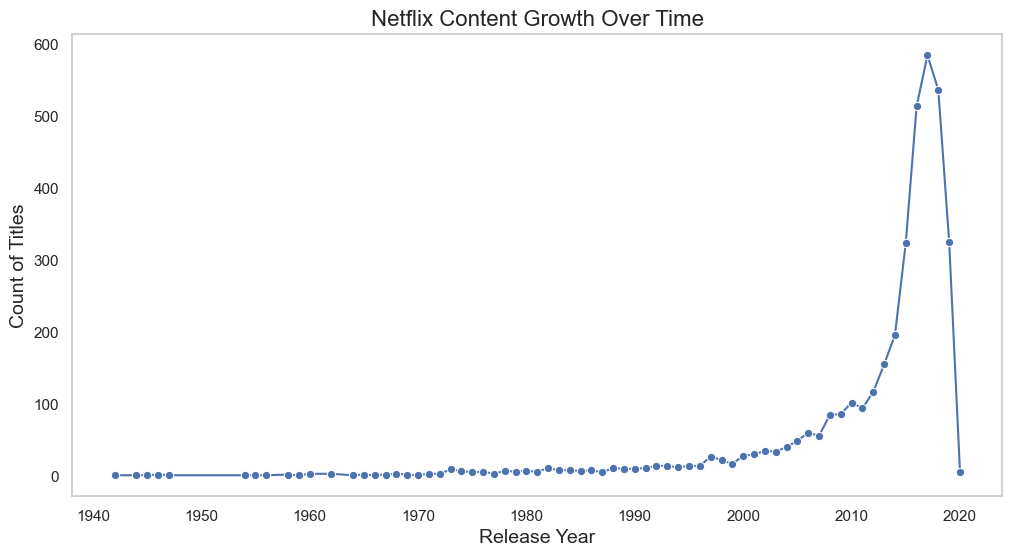

In [43]:
# Count content by release year
content_growth = netflix['release_year'].value_counts().sort_index()

# Visualize
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_growth.index, y=content_growth.values, marker='o', color='b')
plt.title('Netflix Content Growth Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count of Titles', fontsize=14)
plt.grid()
plt.show()


Let's compare the durations of TV shows and movies on Netflix using a boxplot. This visualization helps to understand the distribution of durations, highlighting the differences between TV shows and movies in terms of their length in minutes.

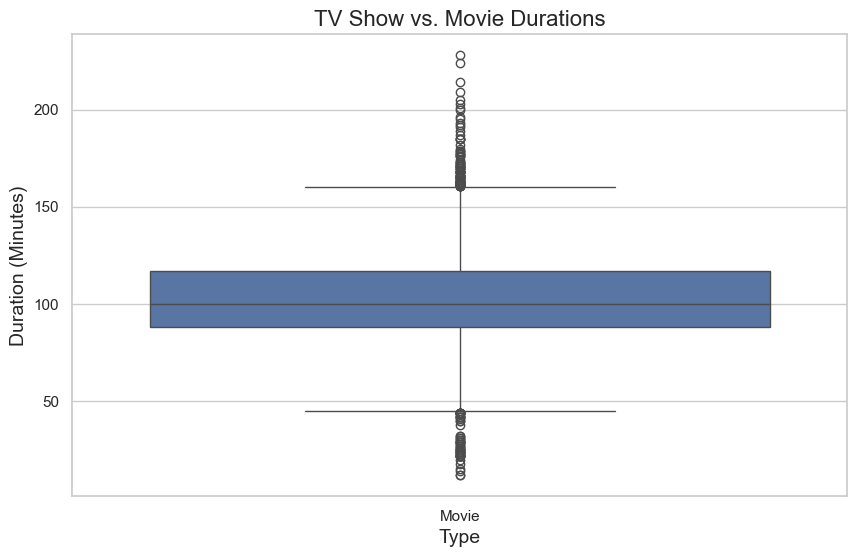

In [45]:
# Compare durations using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration', data=netflix[netflix['duration'].str.contains('min')].assign(duration=lambda x: x['duration'].str.replace(' min', '').astype(int)))
plt.title('TV Show vs. Movie Durations', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Duration (Minutes)', fontsize=14)

# Save the plot as a PNG file
plt.savefig("tv_show_vs_movie_durations.png", format="png")

# Show the plot
plt.show()


Let's analyze and visualize the distribution of content ratings on Netflix. This bar plot shows the frequency of different ratings across all available content, helping us understand how the content is rated overall.

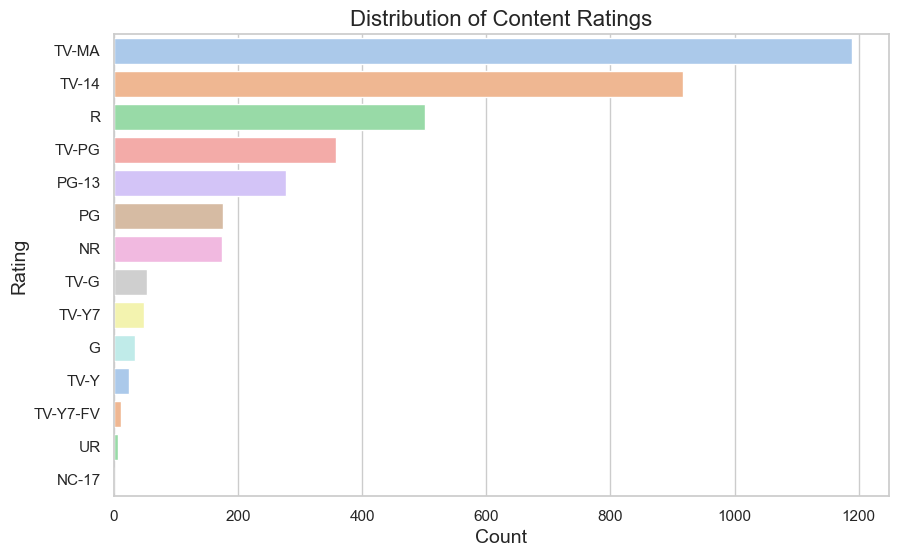

In [46]:
# Visualize
# Analyze rating distribution
rating_counts = netflix['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, hue=rating_counts.index, palette='pastel', dodge=False)
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()


This code identifies and visualizes seasonal trends by analyzing the count of content added to Netflix each month. The bar plot provides insight into the months when the most content is added, helping to identify any patterns in content releases.

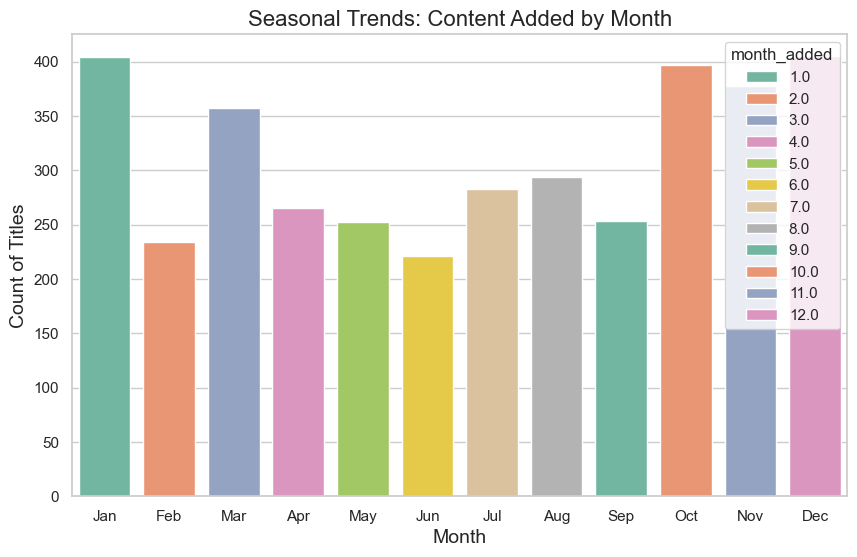

In [47]:
# Extract month from date_added
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix['month_added'] = netflix['date_added'].dt.month

# Count content by month
monthly_counts = netflix['month_added'].value_counts().sort_index()

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, hue=monthly_counts.index, palette='Set2', dodge=False)
plt.title('Seasonal Trends: Content Added by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Titles', fontsize=14)
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



lets generate and visualize a word cloud from the titles of content available on Netflix. It helps to identify the most frequently occurring words in the titles, giving insights into common themes or popular terms in Netflix's content library.

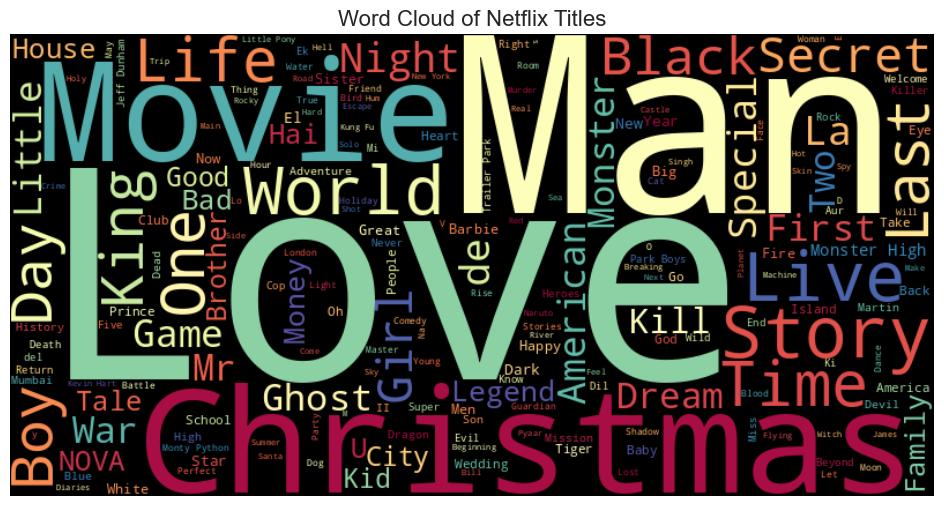

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for titles
title_words = ' '.join(netflix['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Spectral').generate(title_words)

# Visualize
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles', fontsize=16)

# Save the word cloud as a PNG file
plt.savefig("netflix_titles_wordcloud.png", format="png")

# Show the plot
plt.show()


This code extracts the content duration from the "duration" column, converts it to a numerical format (in minutes), and then computes the correlation between the release_year and duration_minutes. The heatmap visualization highlights the strength of the relationship between these two features, helping to identify any trends or patterns.

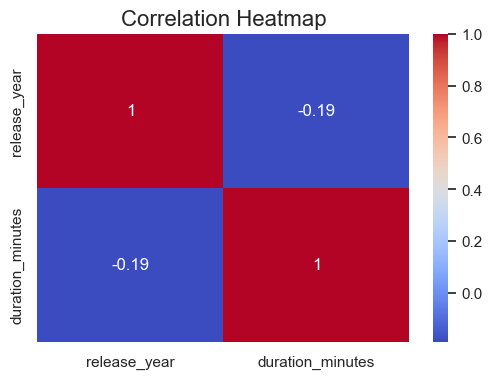

In [49]:
# Derive new features (example: content duration in minutes)
netflix['duration_minutes'] = netflix['duration'].str.replace(' min', '', regex=False).str.extract('(\\d+)').astype(float)

# Correlation heatmap
correlation = netflix[['release_year', 'duration_minutes']].corr()

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


lets identify the columns with missing values in the Netflix dataset and visualizes the missing data distribution using a horizontal bar plot.

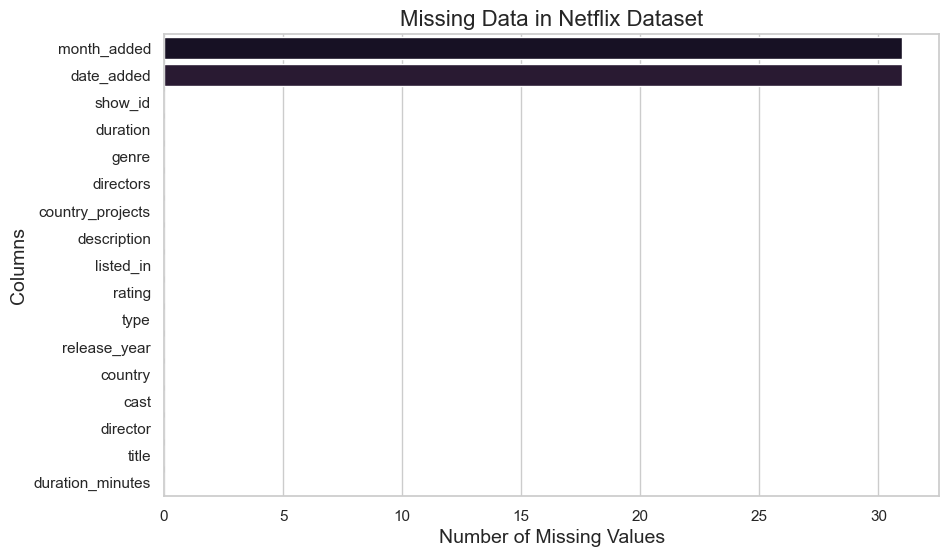

In [50]:
# Check for missing data
missing_data = netflix.isnull().sum().sort_values(ascending=False)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.values, y=missing_data.index, hue=missing_data.index, palette='rocket', dodge=False, legend=False)
plt.title('Missing Data in Netflix Dataset', fontsize=16)
plt.xlabel('Number of Missing Values', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.show()


In [51]:
print(netflix.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'country_projects', 'directors', 'genre', 'month_added',
       'duration_minutes'],
      dtype='object')


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Convert 'rating' to numerical values using LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(netflix['rating'].dropna())

# Proceed with the rest of the code as before
features = netflix[['release_year', 'duration_minutes']].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.7390177731189596


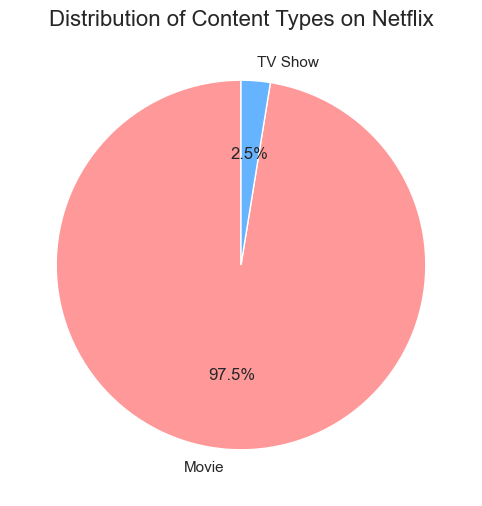

In [53]:
content_type_counts = netflix['type'].value_counts()

# Define a more visually appealing color palette
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 6))
content_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Content Types on Netflix', fontsize=16)
plt.ylabel('')  # Hide the label to make it cleaner
plt.show()


lets in this step visualize how the popularity of different genres on Netflix has evolved over time. By plotting the genre counts per year, it provides insights into trends and shifts in genre preferences. The line chart uses distinct colors for each genre, and the legend is positioned outside the plot for better clarity. The layout is adjusted to ensure there is enough space for the legend, improving the overall presentation of the data.

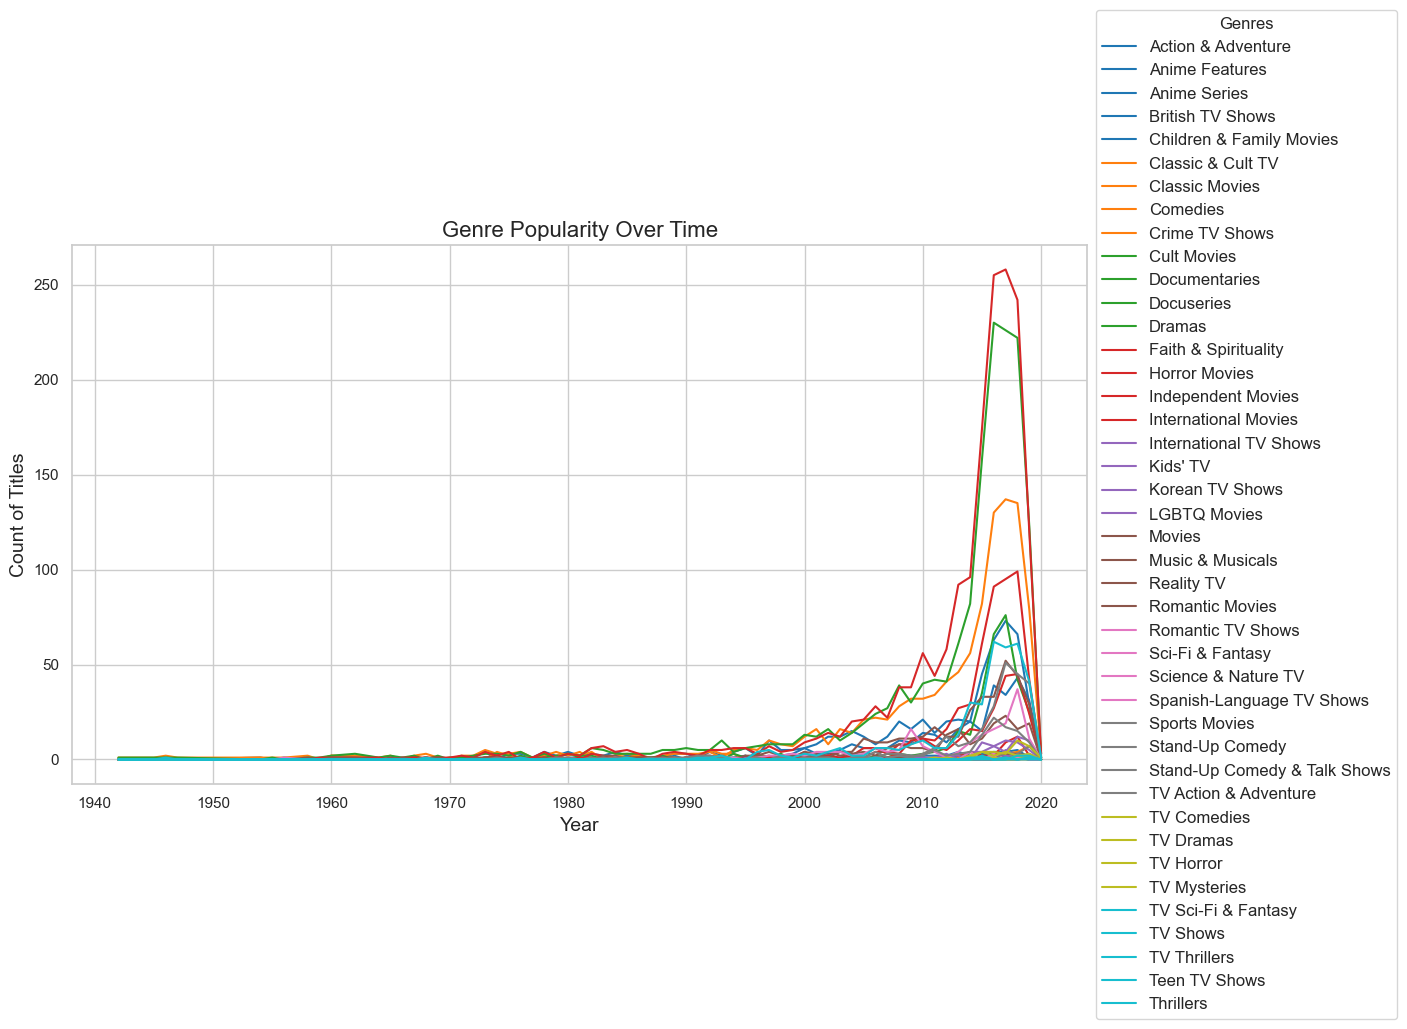

In [55]:
# Assuming 'listed_in' is the column with genres and 'release_year' contains the year of release

# Split genres by comma, explode them to have one genre per row
genre_by_year = netflix[['listed_in', 'release_year']].dropna()
genre_by_year['listed_in'] = genre_by_year['listed_in'].str.split(', ')
genre_by_year = genre_by_year.explode('listed_in')

# Group by year and genre to count the number of occurrences
genre_by_year = genre_by_year.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

# Plot the genre popularity over time
genre_by_year.plot(kind='line', figsize=(14, 7), colormap='tab10')

# Add titles and labels
plt.title('Genre Popularity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Titles', fontsize=14)

# Adjust legend positioning
plt.legend(title='Genres', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Adjust the layout to prevent overlapping elements and expand margins
plt.subplots_adjust(right=0.85)  # Add space to the right for the legend

# Save the plot as a PNG file
plt.savefig("genre_popularity_over_time.png", format="png")

# Show the plot
plt.show()


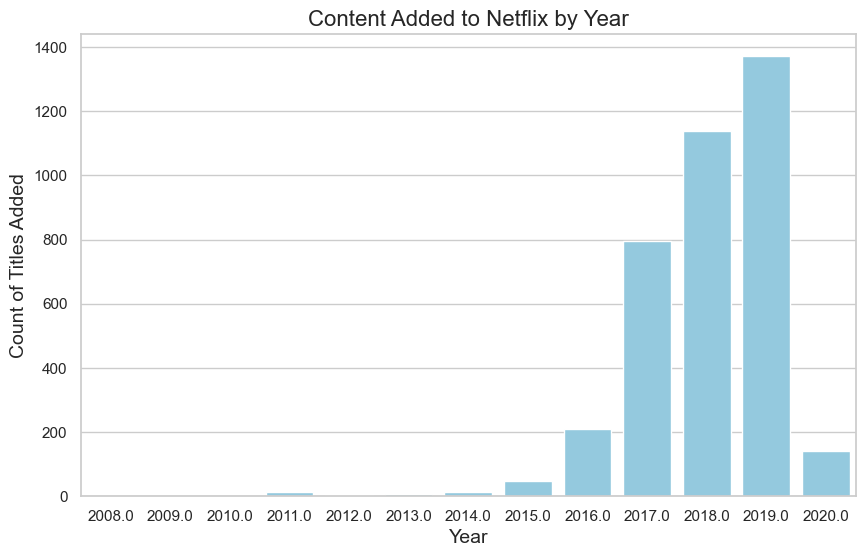

In [56]:
netflix['year_added'] = netflix['date_added'].dt.year
content_by_year = netflix['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=content_by_year.index, y=content_by_year.values, color='skyblue')  # Use a single color instead of palette
plt.title('Content Added to Netflix by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Titles Added', fontsize=14)
plt.show()


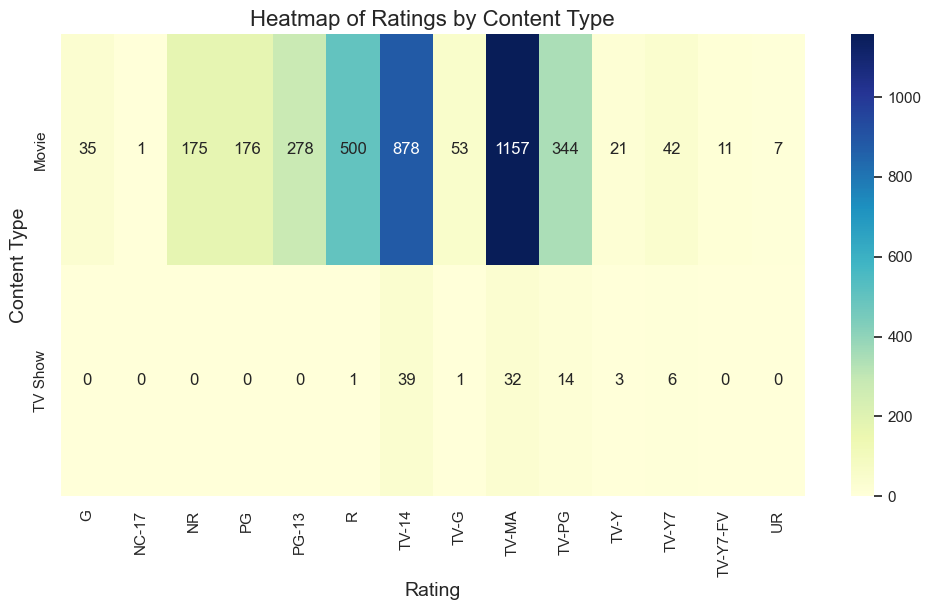

In [58]:
rating_by_type = netflix.groupby('type')['rating'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(rating_by_type, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Ratings by Content Type', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Content Type', fontsize=14)

# Save the heatmap as a PNG file
plt.savefig("rating_by_content_type_heatmap.png", format="png")

# Show the plot
plt.show()


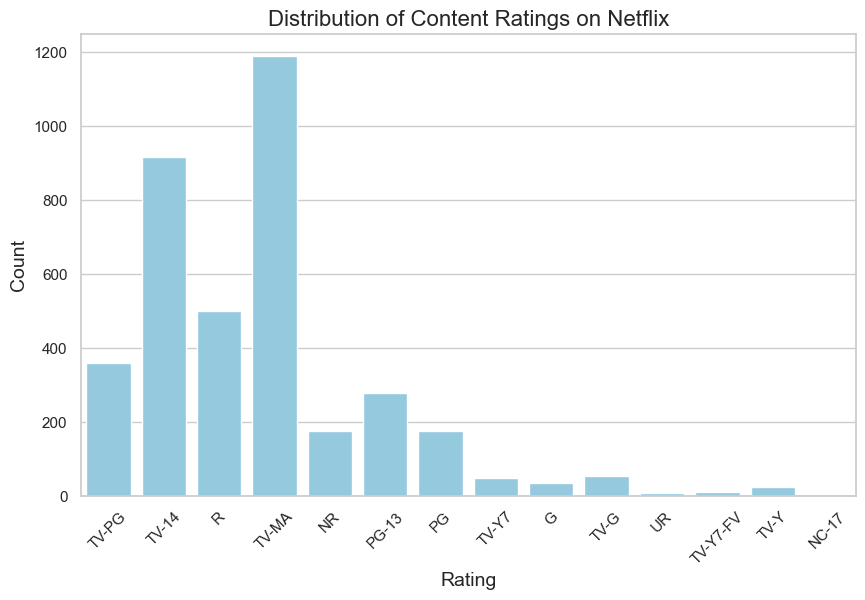

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=netflix, color='skyblue')  # Ensures all bars are the same color
plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()
